# import Setting

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# HW 2-1 
- Power Law Transformation

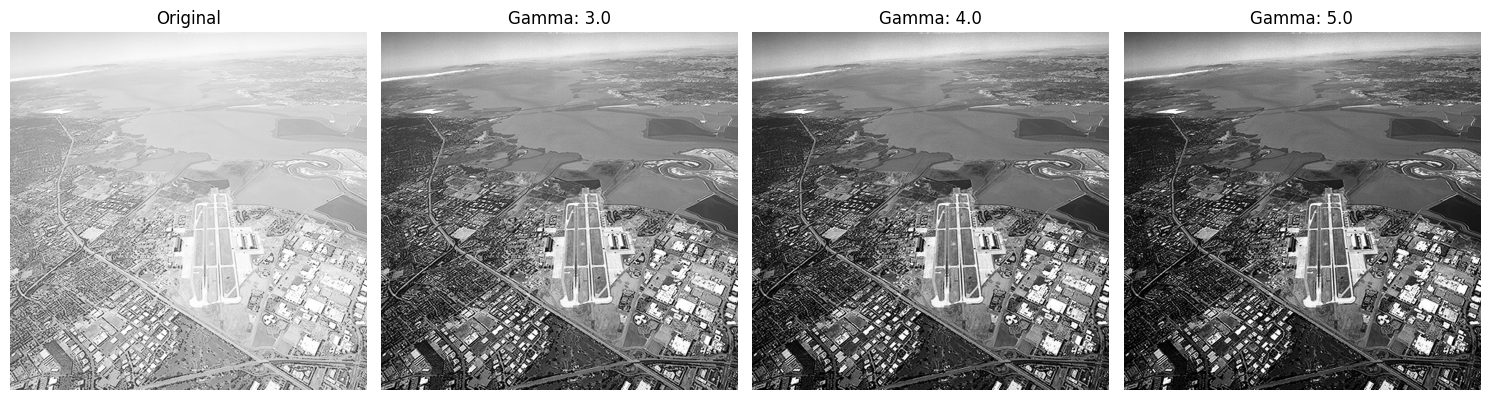

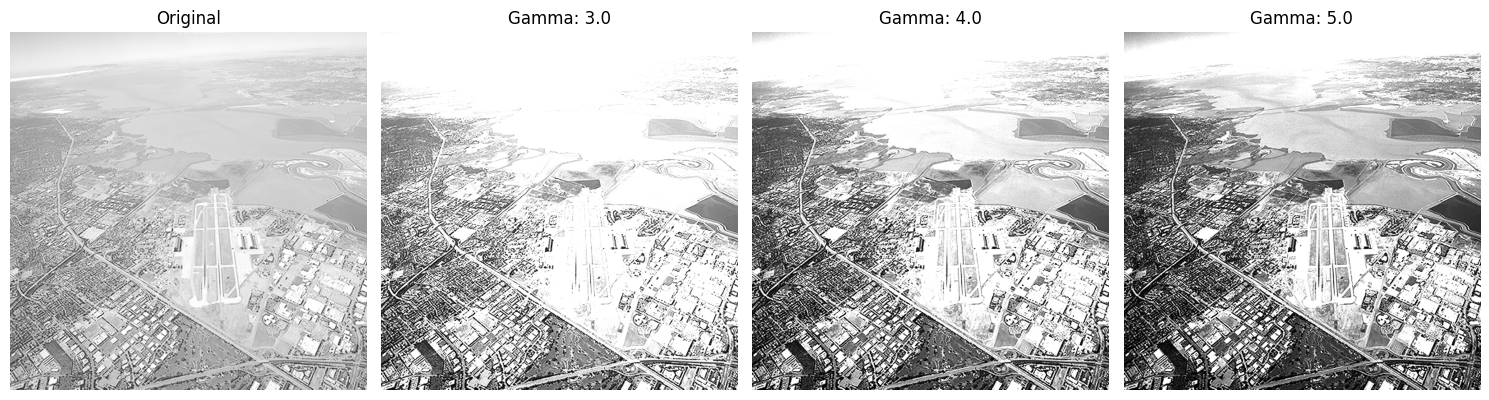

In [7]:

def power_law_transform(image_path, gammas, C=1.0):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_normalized = img / 255.0

    transformed_images = []

    for gamma in gammas:
        power_img = C * np.power(img_normalized, gamma)
        power_img_scaled = np.uint8(np.clip(power_img * 255, 0, 255))
        transformed_images.append((gamma, power_img_scaled))

    # 결과 출력
    plt.figure(figsize=(15, 5))
    plt.subplot(1, len(gammas)+1, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    for i, (gamma, t_img) in enumerate(transformed_images):
        plt.subplot(1, len(gammas)+1, i+2)
        plt.imshow(t_img, cmap='gray')
        plt.title(f'Gamma: {gamma}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# 이미지 그리기
image_path = 'img\HW1.tif'  
gammas = [3.0, 4.0, 5.0]
power_law_transform(image_path, gammas, 1)
power_law_transform(image_path, gammas, 2)


- 감마값을 변경하면서 테스트를 진행해본 결과 감마값이 커질수록 이미지의 선명도가 진해졌고 점점 이미지가 어두워졌다. 그리고 scaling 함수값을 키울수록 이미지가 밝아지는 것을 알 수 있었다.

# HW 2-2
- Piecewise-Linear Transformation

In [29]:
def piecewise_linear_transform(image, r1, s1, r2, s2):
    img = image.copy()
    lut = np.zeros(256, dtype=np.uint8)

    for r in range(256):
        if r < r1:
            lut[r] = int((s1 / r1) * r)
        elif r < r2:
            lut[r] = int(((s2 - s1) / (r2 - r1)) * (r - r1) + s1)
        else:
            lut[r] = int(((255 - s2) / (255 - r2)) * (r - r2) + s2)
    transformed = lut[image]
    return transformed


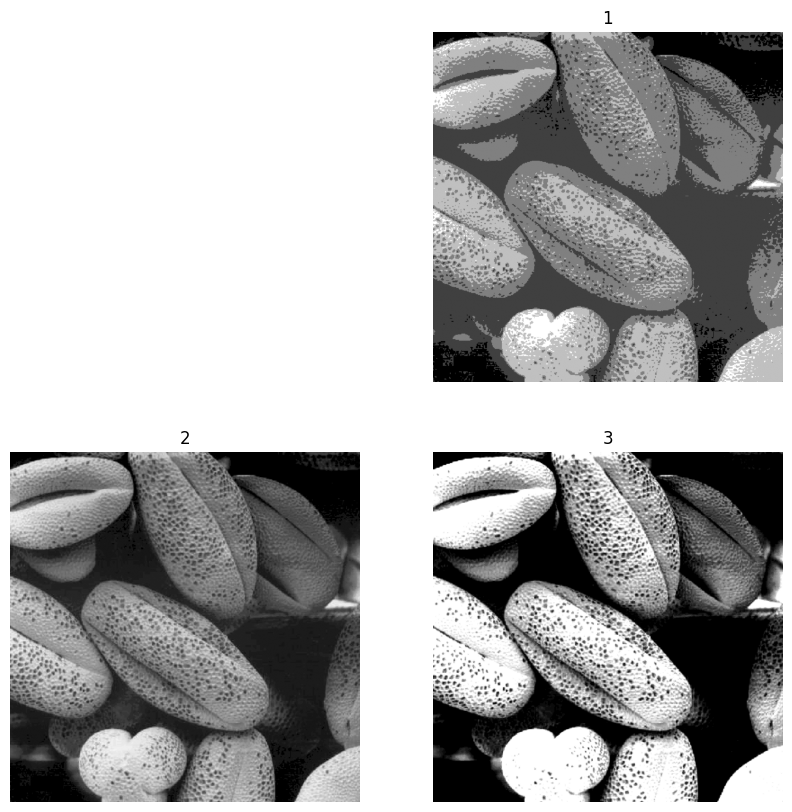

In [30]:
img = cv2.imread('img/HW2.tif', cv2.IMREAD_GRAYSCALE)
result1 = piecewise_linear_transform(img, 30, 120, 220, 135)
result2 = piecewise_linear_transform(img, 50, 0, 180, 255)
result3 = piecewise_linear_transform(img, 100, 0, 120, 255)

plt.figure(figsize=(10,10))

plt.subplot(2,2,2)
plt.imshow(result1, cmap='gray')
plt.title("1")
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(result2, cmap='gray')
plt.title("2")
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(result3, cmap='gray')
plt.title("3")
plt.axis('off')

plt.show()



r1-r2: 입력 볼륨 조절 영역
s1-s2: 출력 볼륨 목표 구간

즉, r1과 r2로 조정 하고싶은 구간을 산정하고 s1와 s2로 출력볼륨을 조정하는 방식인것이다.
1번 이미지는 넓은 픽셀 범위(30~220)를 좁은 영역의 회색(120-135)으로 조정하여 이미지를 뿌옇게 만들었고
2번 이미지는 중간 픽셀 범위(50-180)를 넓은 색깔의 영역으로 확장 (0-255)하여 이미지를 선명하게
3번 이미지는 좁은 픽셀 범위(100-120)를 넓은 색깔 영역으로 확장 (0-255) 하여 강한대비로 이미지가 극명하게 만들었다

# HW 2-3
- Mask

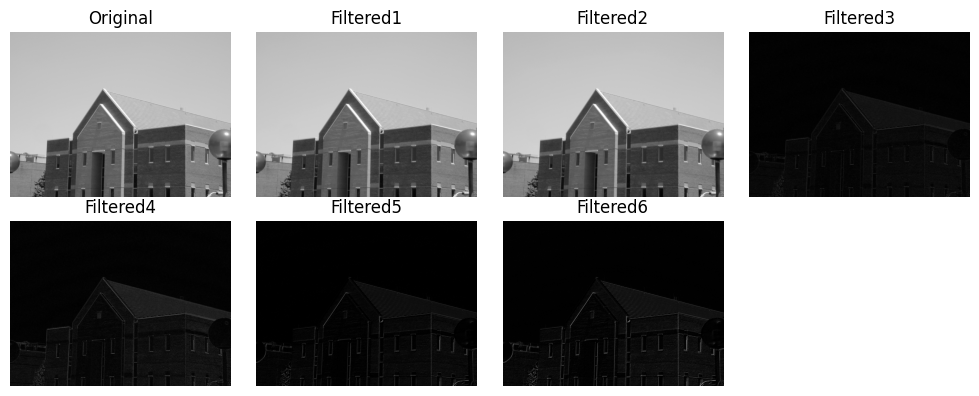

In [ ]:
# 이미지 입력
image = cv2.imread('img\HW3.jpg', cv2.IMREAD_GRAYSCALE)

# 마스크
kernel1 = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])
kernel2 = np.array([[0.0030, 0.0133, 0.0219,0.0133,0.0030],
                   [0.0133, 0.0596, 0.0983,0.0596,0.0133],
                   [0.0219,0.0983, 0.1621, 0.0983,0.0219],
                   [0.0133,0.0596, 0.0983, 0.0596,0.0133],
                   [0.0030,0.0133, 0.0219, 0.0133,0.0030]])
kernel3 = np.array([[0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]])
kernel4 = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])
kernel5 = np.array([[-1, 0, 0],
                   [0, 0, 0],
                   [0, 0, 1]])
kernel6 = np.array([[-1, -1, 0],
                   [-1, 0, 1],
                   [0, 1, 1]])

# 컨볼루션 적용
filtered_image1 = cv2.filter2D(image, -1, kernel1)
filtered_image2 = cv2.filter2D(image, -1, kernel2)
filtered_image3 = cv2.filter2D(image, -1, kernel3)
filtered_image4 = cv2.filter2D(image, -1, kernel4)
filtered_image5 = cv2.filter2D(image, -1, kernel5)
filtered_image6 = cv2.filter2D(image, -1, kernel6)
# 시각화
plt.figure(figsize=(10, 4))
plt.subplot(2, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(filtered_image1, cmap='gray')
plt.title("Filtered1")
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(filtered_image2, cmap='gray')
plt.title("Filtered2")
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(filtered_image3, cmap='gray')
plt.title("Filtered3")
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(filtered_image4, cmap='gray')
plt.title("Filtered4")
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(filtered_image5, cmap='gray')
plt.title("Filtered5")
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(filtered_image6, cmap='gray')
plt.title("Filtered6")
plt.axis('off')
plt.tight_layout()
plt.show()





Filtered 1, 2번은 전체적으로 이미지가 부드러워진 느낌이고 
3번은 색상 반전 및 약하게 경계값을 강조 
4번은 경계값을 더 강하게 강조하는 마스크이고
5번은 대각선 경계에 대해서 강조되는 마스크
6번은 다양한 방향에서 경계가 검출된다.

# HW 2-4
- Sobel-edge

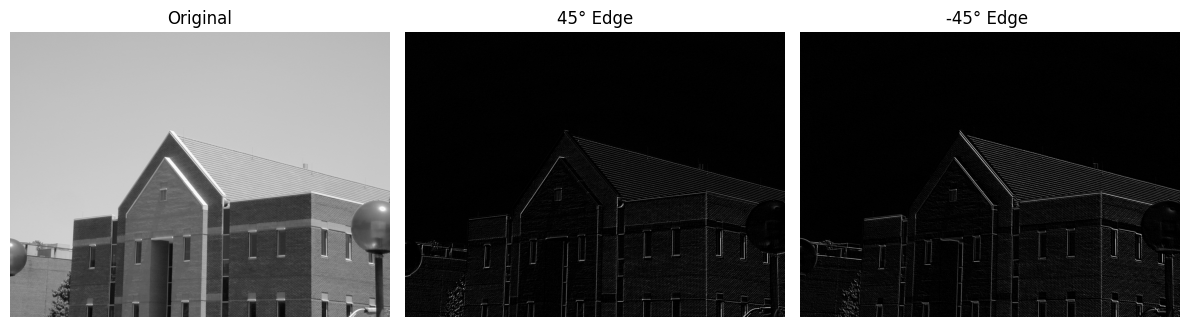

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('img\HW3.jpg', cv2.IMREAD_GRAYSCALE)

# 45도 방향 마스크
kernel_45 = np.array([
    [-1, -1,  0],
    [-1,  0,  1],
    [ 0,  1,  1]
])

# -45도 방향 마스크
kernel_neg_45 = np.array([
    [ 0,  1,  1],
    [-1,  0,  1],
    [-1, -1,  0]
])


edge_45 = cv2.filter2D(img, -1, kernel_45)
edge_neg_45 = cv2.filter2D(img, -1, kernel_neg_45)


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(edge_45, cmap='gray')
plt.title("45° Edge")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(edge_neg_45, cmap='gray')
plt.title("-45° Edge ")
plt.axis("off")

plt.tight_layout()
plt.show()


# HW 2-5
- Morphological Operations

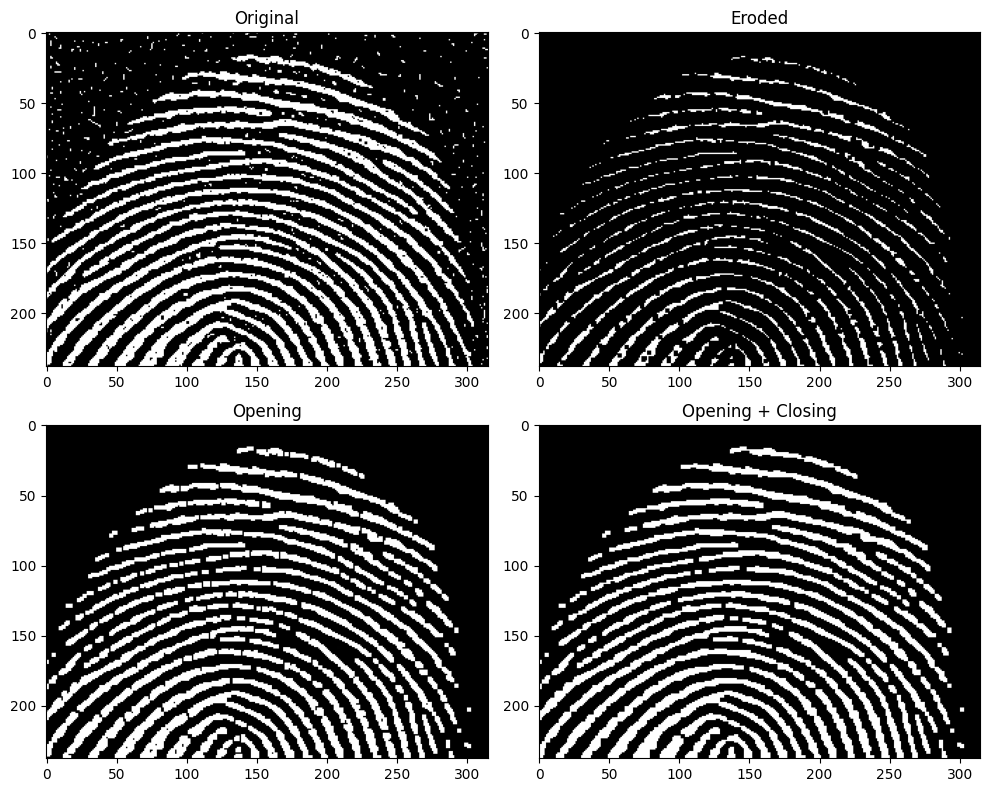

In [ ]:


img = cv2.imread('img\HW5.jpg', cv2.IMREAD_GRAYSCALE)

# 커널 
kernel = np.ones((3, 3), np.uint8)

# 침식
eroded = cv2.erode(img, kernel, iterations=1)

# 오프닝
opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# 클로징
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

# 시각화
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")

plt.subplot(2, 2, 2)
plt.imshow(eroded, cmap='gray')
plt.title("Eroded")

plt.subplot(2, 2, 3)
plt.imshow(opened, cmap='gray')
plt.title("Opening")

plt.subplot(2, 2, 4)
plt.imshow(closed, cmap='gray')
plt.title("Opening + Closing")

plt.tight_layout()
plt.show()


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_8900\3087648839.py:33: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_8900\3087648839.py:33: UserWarning: Glyph 48277 (\N{HANGUL SYLLABLE BEOB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


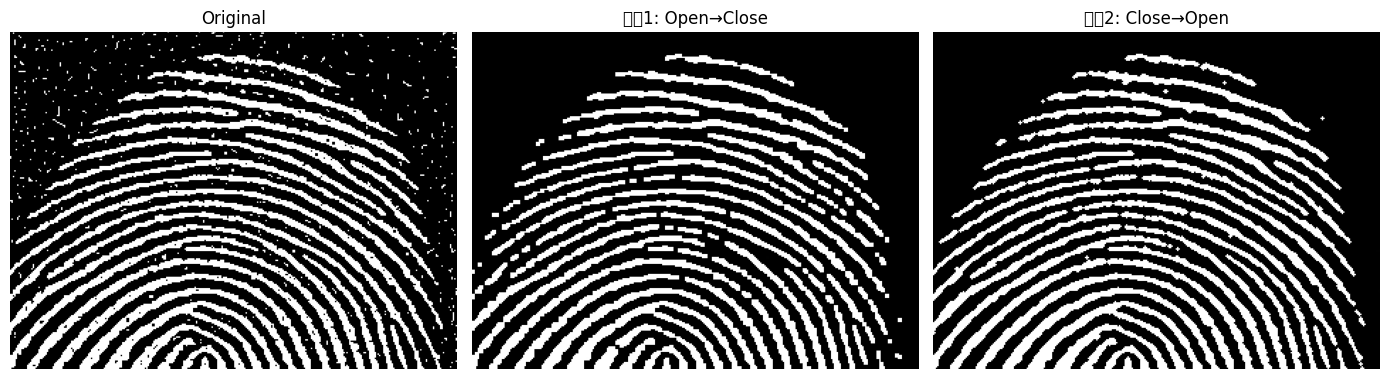

In [ ]:
# 1. 노이즈 이미지 불러오기
img = cv2.imread('img/HW5.jpg', cv2.IMREAD_GRAYSCALE)

# 2. 커널 정의
kernel = np.ones((3, 3), np.uint8)

#(Opening → Closing)
eroded = cv2.erode(img, kernel, iterations=1)
opened1 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closed1 = cv2.morphologyEx(opened1, cv2.MORPH_CLOSE, kernel)

#(Closing → Opening)
closed2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_small)
opened2 = cv2.morphologyEx(closed2, cv2.MORPH_OPEN, kernel_small)

plt.figure(figsize=(14, 8))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(closed1, cmap='gray')
plt.title("방법1: Open→Close")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(opened2, cmap='gray')
plt.title("방법2: Close→Open")
plt.axis('off')

plt.tight_layout()
plt.show()


Open 과 close의 순서를 바꿔서 비교해보았다. 강의에 배운 순서인 open-> close는 노이즈를 모두 잡아주는 방향으로 지문 이미지를 처리하였으나 지문 중간에 끊김이 생기었고
개선 방법으로 둘의 순서를 바꿔서 처리해보았을때 대부분의 노이즈가 잡히고 또, 지문의 두께와 특히 끝 라인이 모두 표현되는 것을 보아 close -> open이 더 나은 방식인 것 같다고 생각했다.

# HW 2-6
- Erosion

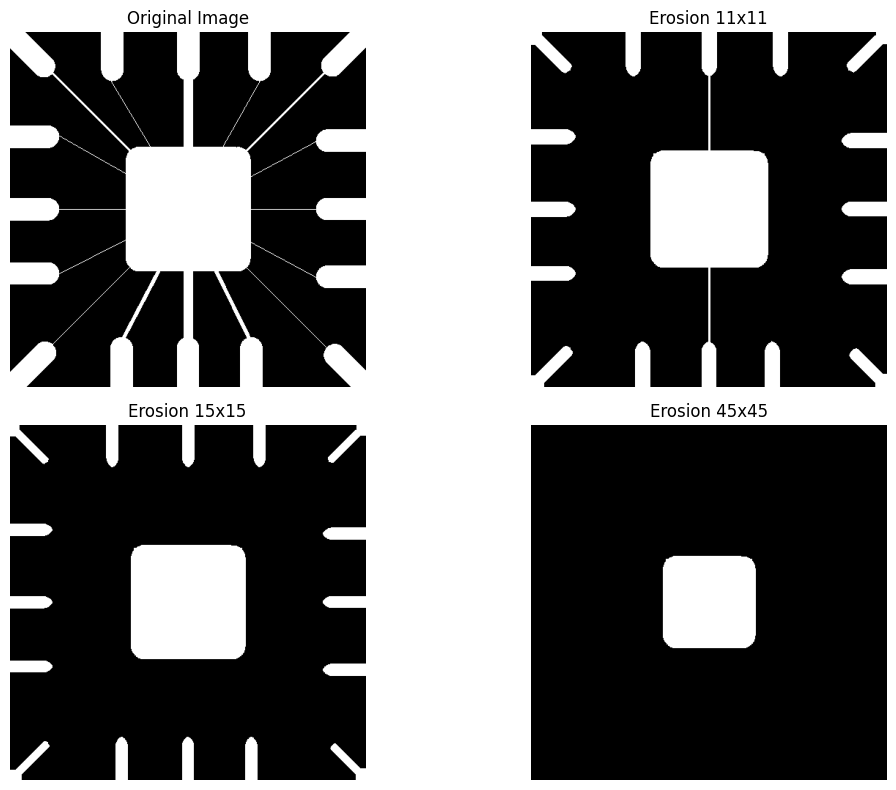

In [ ]:

img = cv2.imread('img\HW6.tif', cv2.IMREAD_GRAYSCALE) 

# 커널 생성
kernel_11 = np.ones((11, 11), np.uint8)
kernel_15 = np.ones((15, 15), np.uint8)
kernel_45 = np.ones((45, 45), np.uint8)

# 침식 연산 
eroded_11 = cv2.erode(img, kernel_11, iterations=1)
eroded_15 = cv2.erode(img, kernel_15, iterations=1)
eroded_45 = cv2.erode(img, kernel_45, iterations=1)

# 시각화
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(eroded_11, cmap='gray')
plt.title("Erosion 11x11")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(eroded_15, cmap='gray')
plt.title("Erosion 15x15")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(eroded_45, cmap='gray')
plt.title("Erosion 45x45")
plt.axis('off')

plt.tight_layout()
plt.show()


커널의 값을 변경해가며 침식을 진행하였고 15*15에서 선분이 모두 없어진 모습을 볼 수 있었다.

# HW 2-7
- Edge 검출 알고리즘

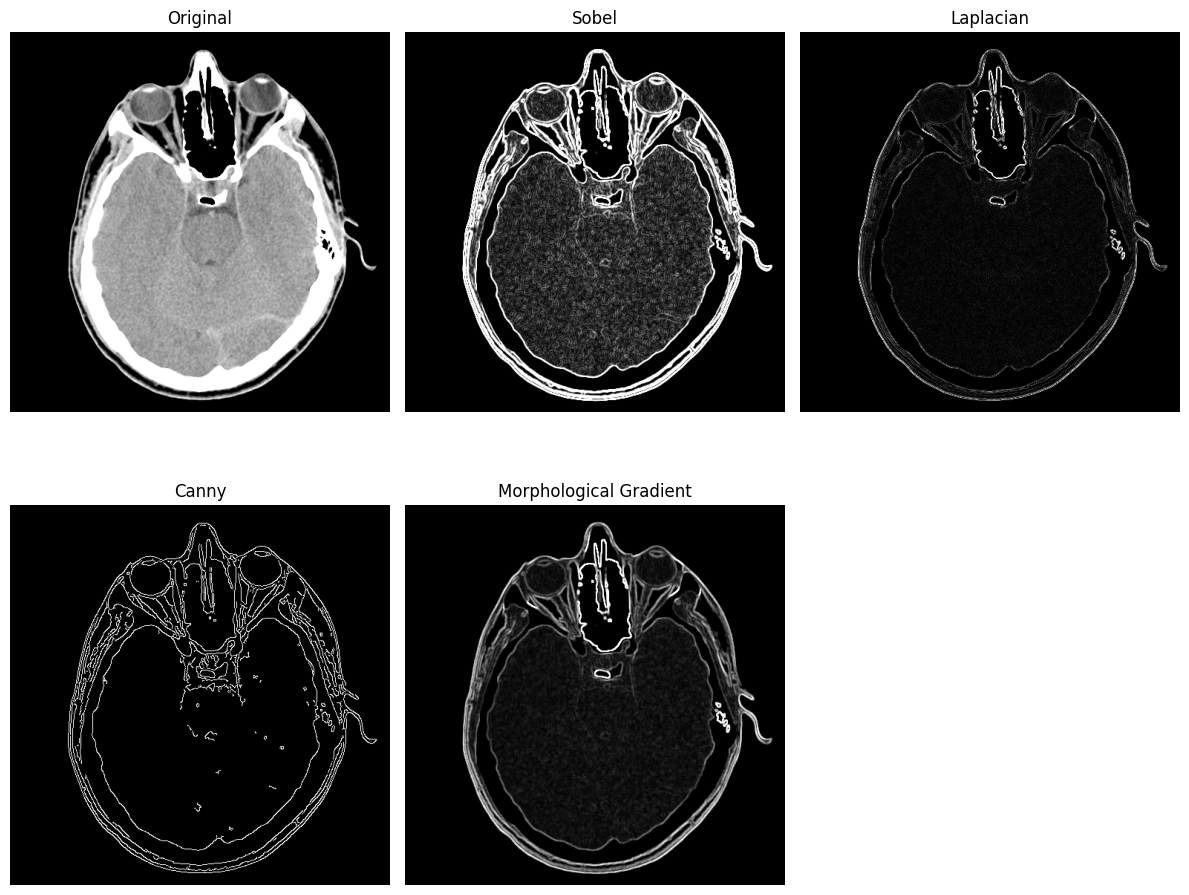

In [ ]:
# 이미지 불러오기 (흑백)
img = cv2.imread('img\HW7.tif', cv2.IMREAD_GRAYSCALE)

# Sobel
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)
sobel = np.uint8(np.clip(sobel, 0, 255))

# Laplacian Edge Detection
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = np.uint8(np.clip(np.abs(laplacian), 0, 255))

# Canny Edge Detection
canny = cv2.Canny(img, 100, 200)

# Morphological Gradient
kernel = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(img, kernel)
eroded = cv2.erode(img, kernel)
morph_gradient = cv2.absdiff(dilated, eroded)

# 결과 시각화
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(sobel, cmap='gray')
plt.title("Sobel")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(canny, cmap='gray')
plt.title("Canny")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(morph_gradient, cmap='gray')
plt.title("Morphological Gradient")
plt.axis('off')

plt.tight_layout()
plt.show()

-Sobel
 경계값을 밝게 올려서 경계를 극명히 하는 방식으로 보임
-Laplacian
 경계값 외 다른 부분을 어둡게 만들어서 경계가 잘 보이게 하는 방식
-Canny
 경계만 추적하여 남기는 방식
-Morphological Gradient
 라플라시안과 비슷한 결과를 보이지만 좀 더 약한 느낌으로 경계 강조


# HW 2-8
- Morphological Smoothing& Smoothing Filter


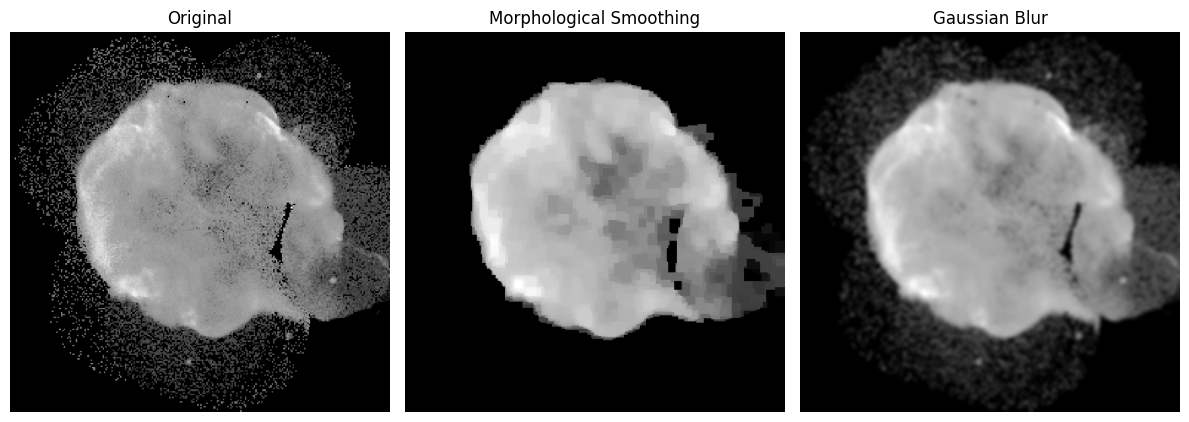

In [ ]:

img = cv2.imread('img\HW8.tif', cv2.IMREAD_GRAYSCALE)

#Morphological Smoothing 
kernel = np.ones((11, 11), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
morph_smooth = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

#Smoothing Filter 
smooth_blur = cv2.GaussianBlur(img, (11, 11), 3)


plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(morph_smooth, cmap='gray')
plt.title("Morphological Smoothing")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(smooth_blur, cmap='gray')
plt.title("Gaussian Blur")
plt.axis('off')

plt.tight_layout()
plt.show()

-Morphological Smoothing
 침식과 팽창을 통해서 노이즈를 제가하는 방식이라서 보다 깔끔하게 노이즈가 제거되는 모습을 보임 하지만
 전체적으로 이미지가 뭉개는 결과가 나옴
-Smoothing Filter
 단순히 이미지를 부드럽게 만들어서 노이즈가 제거되지는 않고 이미지 전체가 부드러워지는 느낌을 보임 원본
 이미지의 디테일을 어느정도는 살려서 결과를 보임

# HW 2-9
- Ostu & Ostu+Top-hat

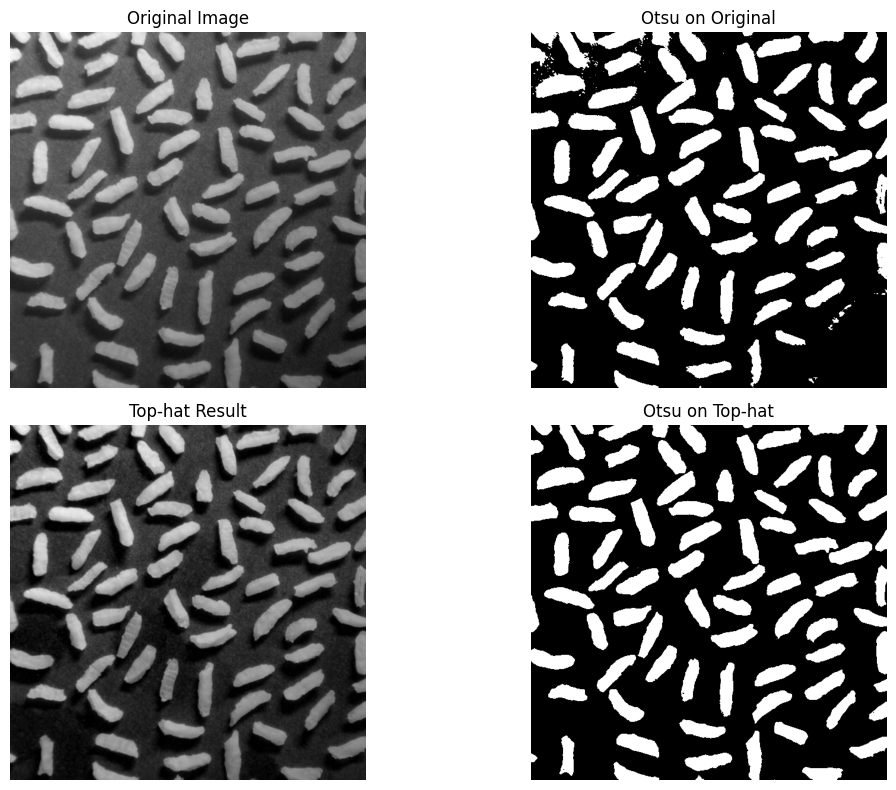

In [ ]:
# 이미지 불러오기 (흑백)
img = cv2.imread('img\HW9.tif', cv2.IMREAD_GRAYSCALE)

# 디스크 모양의 구조 요소 생성 (반지름 40)
radius = 40
kernel_size = radius * 2 + 1
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

# Opening 연산 
background = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Top-hat 변환
tophat = cv2.subtract(img, background)

# Otsu 이진화1
_, otsu_orig = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu 이진화2
_, otsu_tophat = cv2.threshold(tophat, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 시각화
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(otsu_orig, cmap='gray')
plt.title("Otsu on Original")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(tophat, cmap='gray')
plt.title("Top-hat Result")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(otsu_tophat, cmap='gray')
plt.title("Otsu on Top-hat")
plt.axis('off')

plt.tight_layout()
plt.show()


바로 Otsu를 사용한 이미지는 2진화의 퀄리티가 조금 낮지만
Top-hat을 통해 이미지를 선명히 한 후 처리한 Otsu는 이진화가 비교했을때 좀 더 우수하게 구분된다.

# HW 10
- Morphological Segmentation

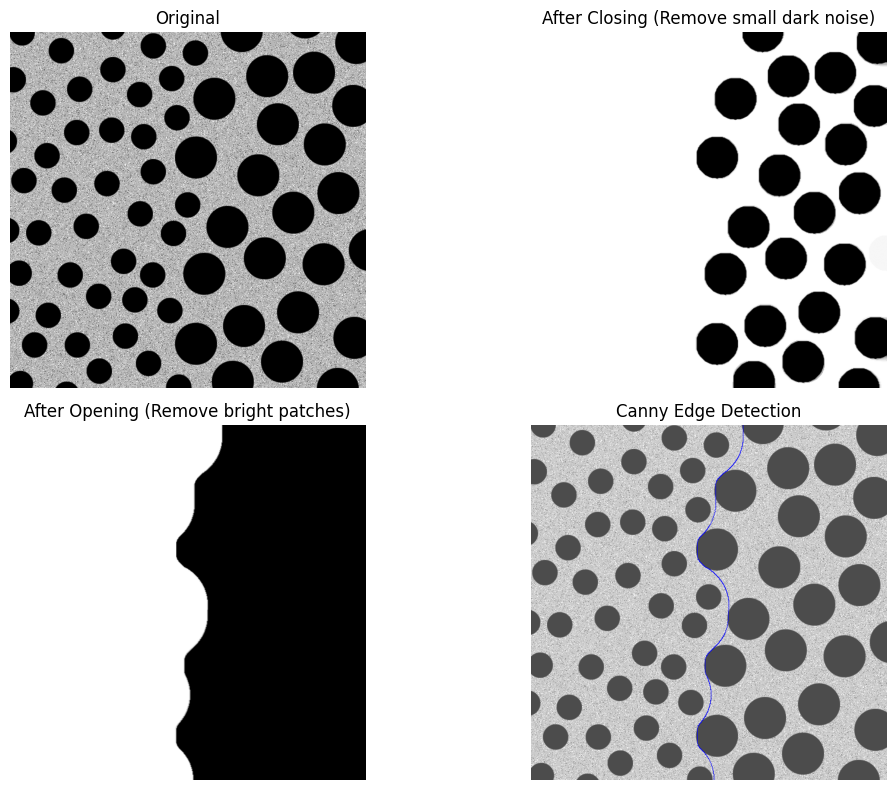

In [ ]:

img = cv2.imread('img/HW10.tif', cv2.IMREAD_GRAYSCALE)

#연산으로 노이즈 제거
kernel_dark = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (60, 60))  
kernel_bright = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (140, 140))  

closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_dark)

opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel_bright)

edges = cv2.Canny(opened, 50, 150)

# 원본을 컬러로 변환
img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# 경계 그리기
img_color[edges != 0] = [0, 0, 255]

# 시각화
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(closed, cmap='gray')
plt.title("After Closing (Remove small dark noise)")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(opened, cmap='gray')
plt.title("After Opening (Remove bright patches)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_color, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()